In [1]:
import single_head
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)
from scipy.signal import detrend
from single_head import SingleHead
from multi_head import MultiHead
import matplotlib.gridspec as gridspec
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

C:\Data Science\Advanced Vision\Coursework\AV_CW\SIFT.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gen pickled heads
Sequence=1

In [3]:
mhead=MultiHead.load_from_pickle(Sequence)

Loading Sequence 1...done


In [16]:
mhead.reset_all_head_positions()

for idx in range(14:15):
    
    for head in mhead.heads:
        head.visible=False
    
    
    link=mhead.links[idx]
    link.reset()
    mhead.ransac_from_link(link)

    head1 = mhead.heads[mhead.head_id_from_frame_id(link.right)]
    head2 = mhead.heads[mhead.head_id_from_frame_id(link.left)]

    right_to_left = head2.visible and not head1.visible
    if right_to_left:
        mhead.last_head_id = mhead.head_id_from_frame_id(link.right)
    else:
        mhead.last_head_id = mhead.head_id_from_frame_id(link.left)

    # perform the transformation based on the calculated SIFT matches:
    mhead.sift_transform_from_link(link, right_to_left,all_points=False)
    
    mhead.reset_all_head_colors()
    mhead.heads[mhead.last_head_id].paint([.2,.2,1])
    head1.visible=True
    head2.visible=True

#     mhead.show_spheres(sparcity=0.5, name=None, alpha=0)
    


[[ 0.95514895 -0.08752369 -0.2828959 ]
 [ 0.07780377  0.99593282 -0.04543555]
 [ 0.285722    0.02138735  0.95807386]]



[[ 0.83645022 -0.14903191 -0.52739029]
 [ 0.13212496  0.9887684  -0.06985736]
 [ 0.53187783 -0.01124922  0.84674638]]



[[ 0.61829474 -0.20725739 -0.75812663]
 [ 0.19250093  0.97515768 -0.10959425]
 [ 0.76200722 -0.07817853  0.6428321 ]]



[[ 0.34801244 -0.21877396 -0.91160589]
 [ 0.23777433  0.96119239 -0.13990195]
 [ 0.90683555 -0.16806886  0.38652574]]



[[-0.07001489 -0.25506812 -0.96438487]
 [ 0.23737993  0.93472612 -0.26445766]
 [ 0.96889044 -0.24744158 -0.0048967 ]]



[[-0.44289997 -0.25910018 -0.85831621]
 [ 0.25847946  0.87978421 -0.39895878]
 [ 0.85850334 -0.39855594 -0.32268433]]



[[-0.74114751 -0.2282718  -0.63134171]
 [ 0.13721173  0.86905933 -0.47529867]
 [ 0.65717068 -0.43889391 -0.61277959]]



[[ 0.99104356  0.09635911  0.09245314]
 [-0.0572444   0.93204404 -0.35779461]
 [-0.12064717  0.34929762  0.92921227]]



[[ 0.90811445 -0.22258495 -0.35466051]
 [ 0.0937374   0.93357819 -0.34589747]
 [ 0.40809489  0.28086954  0.86866038]]



[[ 0.76098358 -0.3045431  -0.57285033]
 [ 0.13350975  0.93758994 -0.32109229]
 [ 0.63488514  0.16786485  0.75415002]]



[[ 0.46185552 -0.49949544 -0.73293504]
 [ 0.20096759  0.86379132 -0.46203526]
 [ 0.86388744  0.06609735  0.49932919]]



[[ 0.06231695 -0.59080436 -0.80440463]
 [ 0.24391645  0.79054668 -0.5617301 ]
 [ 0.967792   -0.16120222  0.19337136]]



[[-0.38148747 -0.53564573 -0.75335979]
 [ 0.16313656  0.76318871 -0.62524352]
 [ 0.9098647  -0.36142309 -0.20376353]]



[[-0.78232067 -0.38273648 -0.49141343]
 [ 0.10614206  0.69548751 -0.71065532]
 [ 0.61376562 -0.60811998 -0.50346982]]


In [8]:
mhead.show_spheres(sparcity=0.1, name=None, alpha=0)

In [48]:
mhead.reset_all_head_positions()
for idx in range(15):          
    link=mhead.links[idx]
    link.reset()
    mhead.ransac_from_link(link)

#     mhead.show_spheres(sparcity=0.5, name=None, alpha=0)
    

In [56]:
mhead.reset_all_head_positions()

for idx in range(14):
    link=mhead.links[idx]
    mhead.all_transforms_from_link(link, method="dynamic", ICP=True, Refine_Range=False, Refine_local=False)
    show=False
    if show:
        mhead.reset_all_head_colors()
        mhead.heads[mhead.last_head_id].paint([.2,.2,1])
        mhead.show_spheres(sparcity=0.5, name=None, alpha=0)
mhead.left_eye_deviation()        
    

0 172576
coordinate of the left eye: [ 0.03712042 -0.17596338 -0.02675966] in frame 0
1 172581
coordinate of the left eye: [ 0.04217981 -0.17425815 -0.02888578] in frame 1
12 169336
coordinate of the left eye: [ 0.0728925  -0.16635418 -0.017214  ] in frame 12
13 170000
coordinate of the left eye: [ 0.08236277 -0.16437182  0.00105739] in frame 13
14 169380
coordinate of the left eye: [ 0.07872695 -0.16538889  0.00188269] in frame 14
[ 0.06265649 -0.16926728 -0.01398387]
[[-0.02553607 -0.0066961  -0.01277579]
 [-0.02047668 -0.00499087 -0.01490191]
 [ 0.01023601  0.00291311 -0.00323013]
 [ 0.01970628  0.00489547  0.01504126]
 [ 0.01607046  0.0038784   0.01586656]]
mean coordinate: [ 0.06265649 -0.16926728 -0.01398387]. Distance to each points: [0.0293283  0.02581221 0.01112186 0.0252694  0.02291395].
mean distance: 0.022889144048579797


0.022889144048579797

Head 1:

coverage_based=True, ICP=False, Refine_Range=False, Refine_local=False : 0.044216206828466526
coverage_based=True, ICP=True, Refine_Range=False, Refine_local=False : 0.030542624222510785
coverage_based=False, ICP=False, Refine_Range=False, Refine_local=False : 0.1697366724304663
coverage_based=False, ICP=True, Refine_Range=False, Refine_local=False : 0.13215766825297925
coverage_based=True, ICP=True, Refine_Range=False, Refine_local=True : 0.039201063664484274
method="dynamic", ICP=True, Refine_Range=False, Refine_local=False : 0.022889144048579797





In [68]:
mhead.show_spheres(sparcity=0.2, name=None, alpha=0)

In [45]:
mhead.save()

Saving Completed


In [36]:
for head in mhead.heads:
    mhead.reset_all_head_colors()
    head.visible=True
# mhead.create_png_of_spheres(sparcity=0.4, name=f"Seq_{Sequence}_test_{idx}", alpha=-10+idx*360/15 )
    

In [133]:
mhead.reset_all_head_positions()
for idx in range(0,7):
    mhead.transform_from_link(mhead.links[idx])
    mhead.links[idx].print_short()
for idx in range(14,6,-1):
    mhead.transform_from_link(mhead.links[idx])
    mhead.links[idx].print_short()
# center, distances=mhead.left_eye_deviation()
# np.mean(distances)    

AttributeError: 'MultiHead' object has no attribute 'transform_from_link'

In [116]:
xmhead.create_spheres(0.1 ,"name")

0 172576
coordinate of the left eye: [ 0.03712042 -0.17596338 -0.02675966] in frame 0
1 172581
coordinate of the left eye: [ 0.04215503 -0.17657004 -0.02096971] in frame 1
12 169336
coordinate of the left eye: [ 0.0762687  -0.16833622  0.01106154] in frame 12
13 170000
coordinate of the left eye: [ 0.08453297 -0.16809037  0.03073257] in frame 13
14 169380
coordinate of the left eye: [ 0.08157821 -0.16881599  0.03106292] in frame 14
[ 0.06433107 -0.1715552   0.00502553]
[[-0.02721064 -0.00440818 -0.03178519]
 [-0.02217604 -0.00501484 -0.02599524]
 [ 0.01193764  0.00321898  0.00603601]
 [ 0.02020191  0.00346483  0.02570703]
 [ 0.01724714  0.00273921  0.02603739]]
mean coordinate: [ 0.06433107 -0.1715552   0.00502553]. Distance to each points: [0.04207315 0.03453517 0.01375872 0.03287816 0.03135144].
mean distance: 0.030919327543611697


0.030919327543611697

In [246]:
mhead.reset_all_head_positions()
for idx in range(6,14):
    mhead.transform_from_link(mhead.links[idx])
    mhead.links[idx].print_short()
for idx in range(5,-1,-1):
    mhead.transform_from_link(mhead.links[idx])
    mhead.links[idx].print_short()
center, distances=mhead.left_eye_deviation()
np.mean(distances)


8-7, matches=57, Count=34, Err=0.0030



9-8, matches=15, Count=9, Err=0.0299



10-9, matches=7, Count=5, Err=nan



11-10, matches=18, Count=12, Err=0.0075



12-11, matches=55, Count=33, Err=0.0040



13-12, matches=67, Count=36, Err=0.0035



14-13, matches=71, Count=33, Err=0.0065



15-14, matches=65, Count=37, Err=0.0112



7-6, matches=85, Count=57, Err=0.0034



6-5, matches=98, Count=65, Err=0.0030



5-4, matches=107, Count=78, Err=0.0027



4-3, matches=99, Count=58, Err=0.0048



3-2, matches=129, Count=87, Err=0.0053



2-1, matches=109, Count=68, Err=0.0058
0 172576
coordinate of the left eye: [ 0.05802867 -0.1112326   0.1986909 ] in frame 0
1 172581
coordinate of the left eye: [ 0.05610711 -0.10592204  0.19808803] in frame 1
12 169336
coordinate of the left eye: [-0.10952395  0.02883137  0.22973919] in frame 12
13 170000
coordinate of the left eye: [-0.10996653  0.02697497  0.23506629] in frame 13
14 169380
coordinate of the left eye: [-0.1071064   0.01737836  0.23768785] in frame 14
[-0.04249222 -0.02879399  0.21985445]
[[ 0.10052089 -0.08243861 -0.02116355]
 [ 0.09859933 -0.07712805 -0.02176642]
 [-0.06703173  0.05762536  0.00988474]
 [-0.06747431  0.05576896  0.01521184]
 [-0.06461418  0.04617235  0.0178334 ]]
mean coordinate: [-0.04249222 -0.02879399  0.21985445]. Distance to each points: [0.13171359 0.12706039 0.08894742 0.0888502  0.08139354].


0.1035930282595802

In [79]:
only_first_n=15
mhead.reset_all_head_positions()
link_index,err=mhead.get_next_unpositioned_link(method="coverage")
positioned_head_count=0
joined_heads=set() 
while(not link_index is None) and (positioned_head_count<only_first_n or only_first_n==-1):
    mhead.links[link_index].print_short()
    joined_heads.add(mhead.links[link_index].left)
    joined_heads.add(mhead.links[link_index].right)
    mhead.heads[mhead.links[link_index].right-1].background_color=np.asarray([0,0,1])
    mhead.heads[mhead.links[link_index].left-1].background_color=np.asarray([0,0,1]) 
    foo= mhead.all_transforms_from_link(mhead.links[link_index], method="coverage", ICP=True, Refine_Range=False, Refine_local=False)
    link_index,err=mhead.get_next_unpositioned_link(method="coverage")
    positioned_head_count=max(positioned_head_count+1,2)
joined_heads=sorted(joined_heads)
no_heads= len(joined_heads)
joined_heads=[str(h) for h in joined_heads]
name= f"Seq_{mhead.heads[0].sequence_id}_frames_{'_'.join(joined_heads)}"
mhead.create_spheres(min(2/max(no_heads,0.2),1),name=name)
mhead.left_eye_deviation()

5-4, Count=35, Err Matches=0.0028, Cov=99.5
4-3, Count=32, Err Matches=0.0075, Cov=99.2
3-2, Count=50, Err Matches=0.0045, Cov=99.1
2-1, Count=41, Err Matches=0.0049, Cov=99.3
1-15, Count=40, Err Matches=0.0039, Cov=99.2
6-5, Count=38, Err Matches=0.0074, Cov=95.1
15-14, Count=20, Err Matches=0.0117, Cov=94.2
14-13, Count=26, Err Matches=0.0127, Cov=89.7
7-6, Count=30, Err Matches=0.0081, Cov=77.3
8-7, Count=16, Err Matches=0.0072, Cov=88.3
13-12, Count=25, Err Matches=0.0052, Cov=74.4
12-11, Count=15, Err Matches=0.0127, Cov=80.5
11-10, Count=11, Err Matches=0.0068, Cov=90.3
10-9, Count=6, Err Matches=nan, Cov=95.5
0 172576
coordinate of the left eye: [ 0.11941367 -0.14799087  0.05481895] in frame 0
1 172581
coordinate of the left eye: [ 0.1212572  -0.14884598  0.06013289] in frame 1
12 169336
coordinate of the left eye: [ 0.10311168 -0.14579274  0.05821601] in frame 12
13 170000
coordinate of the left eye: [ 0.11891502 -0.14557913  0.06979886] in frame 13
14 169380
coordinate of the 

0.00853355094987288

In [78]:
Method C:
method="matches", ICP=True, Refine_Range=False, Refine_local=False 0.006911578285536816
method="matches", ICP=False, Refine_Range=False, Refine_local=False :0.004007484446217772
method="coverage", ICP=True, Refine_Range=False, Refine_local=False :0.004007484446217772
method="coverage", ICP=False, Refine_Range=False, Refine_local=False :0.009462496208674395

    
    
    

SyntaxError: invalid syntax (<ipython-input-78-435bbaa0d732>, line 1)

In [67]:
mean = mhead.left_eye_deviation()
mean

0 172576
coordinate of the left eye: [ 0.12036087 -0.15750652  0.04906706] in frame 0
1 172581
coordinate of the left eye: [ 0.12396184 -0.15325211  0.05266019] in frame 1
12 169336
coordinate of the left eye: [ 0.11192407 -0.15587695  0.04906065] in frame 12
13 170000
coordinate of the left eye: [ 0.12362564 -0.15202059  0.05404017] in frame 13
14 169380
coordinate of the left eye: [ 0.11960109 -0.15403977  0.06415198] in frame 14
[ 0.1198947  -0.15453919  0.05379601]
[[ 0.00046617 -0.00296733 -0.00472895]
 [ 0.00406714  0.00128708 -0.00113582]
 [-0.00797063 -0.00133776 -0.00473536]
 [ 0.00373094  0.00251859  0.00024416]
 [-0.00029361  0.00049942  0.01035597]]
mean coordinate: [ 0.1198947  -0.15453919  0.05379601]. Distance to each points: [0.00560226 0.00441455 0.00936719 0.00450808 0.01037216].
mean distance: 0.006852848643014155


0.006852848643014155

In [149]:
distance=mhead.left_eye_deviation()
print(distance)
mhead.show_spheres(sparcity=0.2, name=f"Seq_{Sequence}_test_{idx}", alpha=alpha )

0 153974
coordinate of the left eye: [ 0.03267466 -0.1476853  -0.00702484] in frame 0
1 150143
coordinate of the left eye: [ 0.0338468  -0.15073654 -0.01064756] in frame 1
2 150124
coordinate of the left eye: [ 0.03606221 -0.15308934 -0.01531575] in frame 2
13 147576
coordinate of the left eye: [ 0.02978849 -0.15166735 -0.01006346] in frame 13
14 150775
coordinate of the left eye: [ 0.03689615 -0.14980135 -0.01361271] in frame 14
[ 0.03385366 -0.15059598 -0.01133286]
[[-1.17900690e-03  2.91067665e-03  4.30802802e-03]
 [-6.86292176e-06 -1.40567106e-04  6.85308128e-04]
 [ 2.20855219e-03 -2.49336069e-03 -3.98289000e-03]
 [-4.06516833e-03 -1.07137201e-03  1.26940030e-03]
 [ 3.04248596e-03  7.94623154e-04 -2.27984645e-03]]
mean coordinate: [ 0.03385366 -0.15059598 -0.01133286]. Distance to each points: [0.00533115 0.00069961 0.00519211 0.00439145 0.00388405].
mean distance: 0.0038996733365901
0.0038996733365901


In [ ]:
for i, link in enumerate(mhead.links):
    print (i)
    link.print_short()

In [ ]:
    link_index,err=mhead.get_next_unpositioned_link()
    positioned_head_count=max(positioned_head_count+1,2)
joined_heads=sorted(joined_heads)
print(joined_heads)
no_heads= len(joined_heads)
joined_heads=[str(h) for h in joined_heads]
name= f"Seq_{mhead.heads[0].sequence_id}_frames_{'_'.join(joined_heads)}"
mhead.create_spheres(min(2/max(no_heads,0.2),1),name=name)

In [ ]:
foo= mhead.transform_from_link(mhead.links[link_index])

In [ ]:
mhead.reset_all_head_positions()
mhead.transform_from_link(mhead.links[0])
mhead.transform_from_link(mhead.links[1])
mhead.create_spheres(0.3)


In [24]:
import pandas as pd
df=pd.DataFrame(columns=['Right', 'Left',  'Err', 'Matches','Inliers Matches','Inliers Points','Coverage'])
for link in mhead.links[:14]:
    df = df.append({'Right' : int(link.right) ,
                    'Left' : int(link.left) ,
                    'Err' : link.err_matches,
                    'Matches' : len(link.matches),
                    'Inliers Matches' : sum(link.inliers_matches),
                    'Inliers Points' : sum(link.inliers_all_points),
                    'Coverage' : link.coverage_all_points} ,
                   ignore_index=True)
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
 Right &  Left &       Err &  Matches &  Inliers Matches &  Inliers Points &  Coverage \\
\midrule
   1.0 &   2.0 &  0.004948 &    104.0 &             32.0 &            36.0 &  0.992952 \\
   2.0 &   3.0 &  0.004540 &    124.0 &             52.0 &            48.0 &  0.991059 \\
   3.0 &   4.0 &  0.007453 &     90.0 &             29.0 &            36.0 &  0.992410 \\
   4.0 &   5.0 &  0.002788 &    100.0 &             48.0 &            41.0 &  0.994517 \\
   5.0 &   6.0 &  0.007409 &     91.0 &             35.0 &            27.0 &  0.950892 \\
   6.0 &   7.0 &  0.008077 &     78.0 &             30.0 &            26.0 &  0.773012 \\
   7.0 &   8.0 &  0.007199 &     55.0 &             20.0 &            20.0 &  0.883464 \\
   8.0 &   9.0 &  0.019275 &     16.0 &              6.0 &             6.0 &  0.681879 \\
   9.0 &  10.0 &       NaN &      8.0 &              6.0 &             7.0 &  0.954591 \\
  10.0 &  11.0 &  0.006762 &     20.0 &              7.0 

In [25]:
df

,Right,Left,Err,Matches,Inliers Matches,Inliers Points,Coverage
0,1.0,2.0,0.004948,104.0,32.0,36.0,0.992952
1,2.0,3.0,0.004540,124.0,52.0,48.0,0.991059
2,3.0,4.0,0.007453,90.0,29.0,36.0,0.992410
3,4.0,5.0,0.002788,100.0,48.0,41.0,0.994517
4,5.0,6.0,0.007409,91.0,35.0,27.0,0.950892
5,6.0,7.0,0.008077,78.0,30.0,26.0,0.773012
6,7.0,8.0,0.007199,55.0,20.0,20.0,0.883464
7,8.0,9.0,0.019275,16.0,6.0,6.0,0.681879
8,9.0,10.0,NaN,8.0,6.0,7.0,0.954591
9,10.0,11.0,0.006762,20.0,7.0,9.0,0.903207


In [168]:
mhead.links[0].left

2

In [ ]:
mhead.create_mesh(f"{Sequence}_mesh")

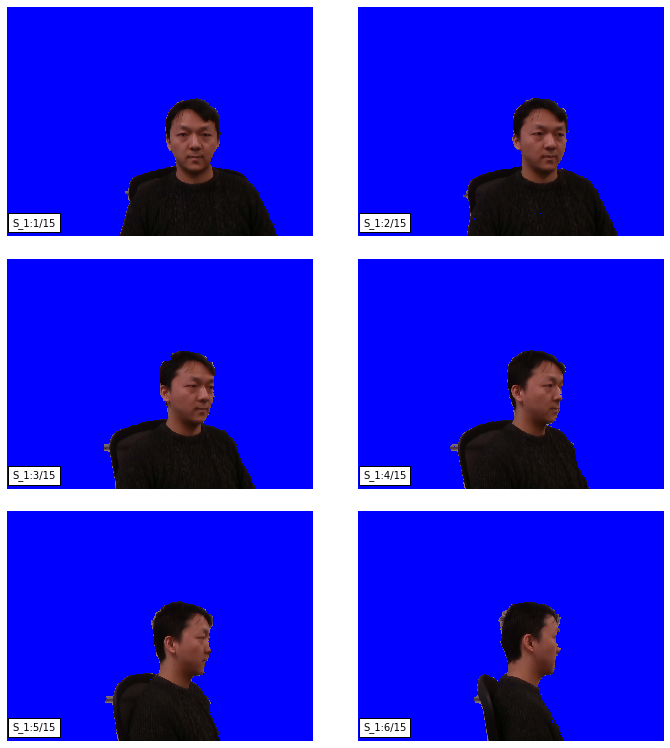

In [102]:
nrows,ncols=3,2
screenwidth=12
plt.figure(figsize = (screenwidth,3/4*nrows*screenwidth/ncols))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.1, hspace=0.1)
for row in range(nrows):
    for col in range(ncols):
        idx=ncols*row+col
        ax=plt.subplot(gs1[idx])
        mhead.heads[idx].background_color=np.array([0,0,1])
        img= mhead.heads[idx].get_filtered_image()
        ax.imshow(img)
        ax.set_axis_off()        
        ax.text(x=10, y=463 , s=f"S_{Sequence}:{idx+1}/15",horizontalalignment='left',
                              verticalalignment='bottom',  bbox=dict(facecolor='white', alpha=1))        
        del ax
plt.savefig(f"2d_filtered_seq_{Sequence}")
plt.show()

C:\Data Science\Advanced Vision\Coursework\AV_CW\single_head.py:297: RuntimeWarning: invalid value encountered in less
  depth_filter = self.xyz[:, 2] < depth


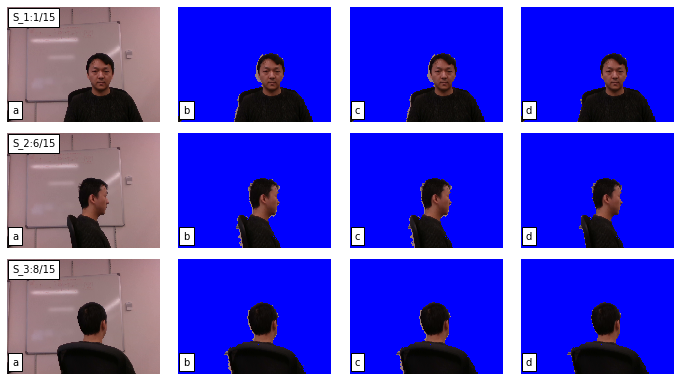

In [104]:
sequence_ids=[0,1,2]
head_ids=[0,5,7]
abcd="abcd"
nrows,ncols=3,4
screenwidth=12
plt.figure(figsize = (screenwidth,3/4*nrows*screenwidth/ncols))
gs1 = gridspec.GridSpec(nrows, ncols)
gs1.update(wspace=0.1, hspace=0.1)
for row in range(nrows):
    head = sequence_ids[row]
    head = sequence_ids[row]
    sequence= sequence_ids[row]
    head_idx=head_ids[row]
    for col in range(ncols):
#         print (sequence, head_idx, col)
        head=mhead.heads[head_idx]
        if col==0:
            img= head.twoD_image            
            
        elif col==1:
            head.reset_filters()
            head.filter_depth(1)
            head.background_color=np.array([0,0,1])
            img= head.get_filtered_image()
        elif col==2:
            head.remove_dangling()
            img= head.get_filtered_image()
        elif col==3:
            head.remove_background_color()
            head.background_color=np.array([0,0,1])
            img= head.get_filtered_image()
        idx=ncols*row+col
        ax=plt.subplot(gs1[idx])
        ax.imshow(img)
        ax.set_axis_off()        
        if col==0:
            ax.text(x=20, y=20 , s=f"S_{sequence+1}:{head_idx+1}/15",horizontalalignment='left',
                                  verticalalignment='top',  bbox=dict(facecolor='white', alpha=1))        

        ax.text(x=20, y=453 , s=f"{abcd[col]}",horizontalalignment='left',
                              verticalalignment='bottom',  bbox=dict(facecolor='white', alpha=1))        
        
        del ax
        
plt.savefig(f"2d_full_seq_{Sequence}")
plt.show()

In [ ]:
linkindex=6
mhead.reset_all_head_positions()
foo= mhead.transform_from_link(mhead.links[linkindex])
mhead.links[linkindex].print_short()
mhead.create_spheres(0.4)

In [ ]:
import glob

In [ ]:
glob.glob("images\Seq_1_frames_SIFT*.png")

In [65]:
mhead.create_mesh("hi")


completed
